In [40]:
import serial
import random
import matplotlib.pyplot as plt
import time
import os
import numpy as np
import subprocess
import multiprocessing
from IPython.lib import backgroundjobs as bg
import h5py
import skimage
import sys
from skimage import io, transform, color, measure, filters
from PIL import ImageTk, Image
import micro_functions as mf
import tkinter
import tkinter.messagebox
import tkinter.filedialog
import shared_variables as share
import hdf_functions as myh5
import gui_functions as gu
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cv2
from cv2 import MOTION_EUCLIDEAN
import scipy

In [110]:
cd C:\Users\y7mandre\Pictures\scanner_imagedump

C:\Users\y7mandre\Pictures\scanner_imagedump


In [111]:
image1=skimage.io.imread('x_1664.jpg')
imageref=skimage.io.imread('x_1662.jpg')

In [112]:
imageref=skimage.filters.gaussian(imageref,5,preserve_range=True,multichannel=True).astype('uint8')

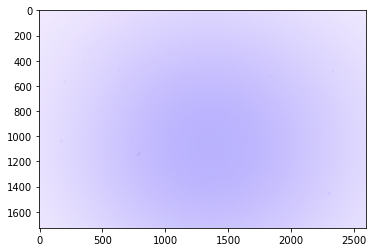

In [113]:
plt.imshow(imageref)

In [114]:
image2_div=image1/imageref
image3_div=np.clip((image2_div*200),0,255).astype('uint8')

In [115]:
image2_sub=np.subtract(image1,(imageref-np.mean(imageref)))
image2_sub=np.clip(image2_sub,0,255)
image3_sub=image2_sub.astype('uint8')

In [137]:
(image2_sub==230).all()

False

In [138]:
test=np.zeros((2,2))

In [140]:
(test==1).all()

False

In [117]:
skimage.io.imsave('corrected_grid_div.tif',image3_div)
skimage.io.imsave('corrected_grid_sub.tif',image3_sub)

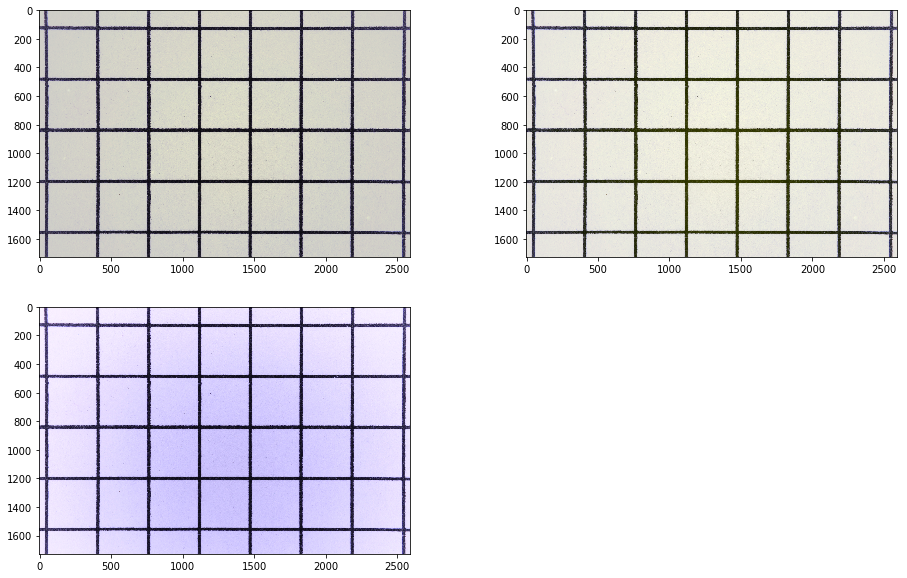

In [118]:
fig,ax=plt.subplots(figsize=(16,10))
plt.subplot(221)
plt.imshow(image3_div)
plt.subplot(222)
plt.imshow(image3_sub)
plt.subplot(223)
plt.imshow(image1)
#plt.colorbar()

In [119]:
image_fake=skimage.io.imread('fake_grid.png')

In [121]:
image3_sub_warp,warpmatrix=mf.register_images_ECC(image1,image3_sub)

In [124]:
warpmatrix

array([[ 1.0000120e+00, -8.0918295e-07, -1.8214323e-02],
       [-1.1062165e-06,  1.0000165e+00, -1.1154195e-02]], dtype=float32)

In [123]:
skimage.io.imsave('corrected_grid_sub_warp.tif',image3_sub_warp)